# Predicting Student Performance with Machine Learning.

In this notebook, I will be using the data collected from two Secondary Schools in portugal to predict student performance in their final exam. I will be tackling the problem using **regression** and **binary classification** algorithms.

Two dataset where given, the data for Mathematics and Portuguese language.

In [1]:
import pandas as pd

path = "./datasets/Student_perf/"
df_port = pd.read_csv(path + "student-por.csv", sep = ";")

## Portuguese Exploration

In [2]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
print("Portuguese dataframe shape:",df_port.shape)

Portuguese dataframe shape: (649, 33)


In [4]:
df_port.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
df_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df_port.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
df_port["age"].value_counts()

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

I am a bit fascinated by the oldest person in the dataset.

In [8]:
for i in range(649):
    if df_port["age"][i] == 22:
        print(df_port.loc[i]["G3"])

5


He has a pretty low final score, Could age be correlated with the final score ?

-----------------------------------------------------------------------------------------------------------------------

Parents Educational background:

0 - none.<br>
1 - primary education (4th grade).<br>
2 – 5th to 9th grade.<br>
3 – secondary education.<br>
4 – higher education.

In [9]:
print(df_port["Fedu"].value_counts())
print(df_port["Medu"].value_counts())

2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64
2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64


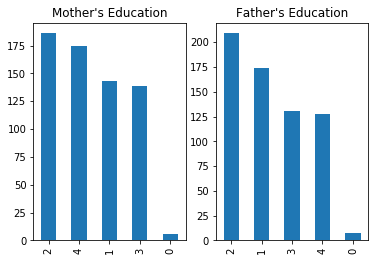

In [10]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1) # (rows, columns, panel number)
df_port["Medu"].value_counts().plot(kind = "bar", title = "Mother's Education");
plt.subplot(1, 2, 2)
df_port["Fedu"].value_counts().plot(kind = "bar", title = "Father's Education");

Parents Jobs:

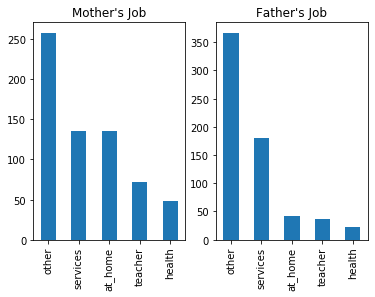

In [11]:
plt.subplot(1, 2, 1) # (rows, columns, panel number)
df_port["Mjob"].value_counts().plot(kind = "bar", title = "Mother's Job");
plt.subplot(1, 2, 2)
df_port["Fjob"].value_counts().plot(kind = "bar", title = "Father's Job");

In [12]:
df_port[["school","sex","age","address","famsize"]]
X = df_port.columns
df_port[X[10:15]].head()

,reason,guardian,traveltime,studytime,failures
0,course,mother,2,2,0
1,course,father,1,2,0
2,other,mother,1,2,0
3,home,mother,1,3,0
4,home,father,1,2,0


In [13]:
Urban_students = df_port[df_port["address"] == "U"]
Rural_students = df_port[df_port["address"] == "R"]
print("Urban students:",Urban_students.shape[0])
print("Rural students:",Rural_students.shape[0])

Urban students: 452
Rural students: 197


In [14]:
print("Missing data by columns:")
df_port.isnull().sum()

Missing data by columns:


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Checking the relationship between Age and Score.

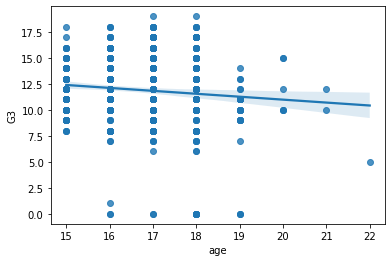

In [11]:
import seaborn as sns
sns.regplot(df_port["age"],df_port["G3"])

The school *Gabriel Pereira*(GP) seems to have have better performance than *Mousinho da Silveira*(MS):

school
GP    12.576832
MS    10.650442
Name: G3, dtype: float64


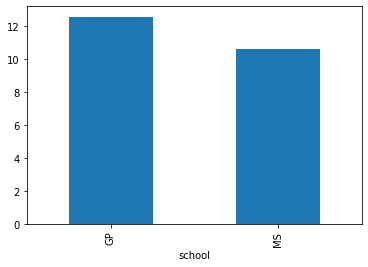

In [12]:
df_port.groupby("school")["G3"].mean().plot(kind="bar")
print(df_port.groupby("school")["G3"].mean())

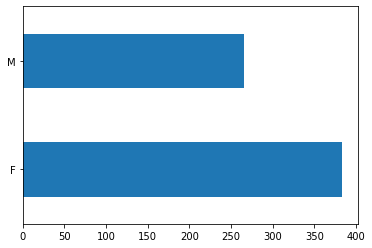

In [13]:
df_port["sex"].value_counts().plot(kind = "barh");

Getting normalize version:

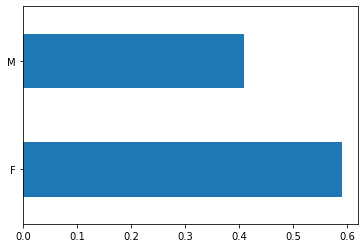

In [14]:
df_port["sex"].value_counts(normalize = True).plot(kind = "barh");

Females tend to perform better than the Males:

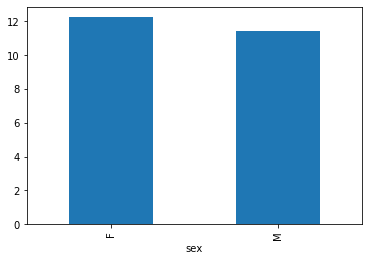

In [15]:
df_port.groupby("sex")["G3"].mean().plot(kind="bar")

In [16]:
df_port["G3"].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

Plotting the Distribution of the final score:

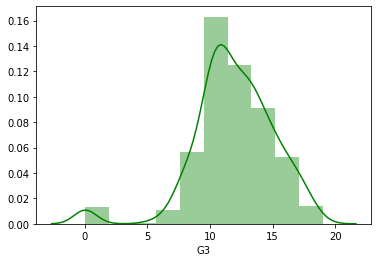

In [17]:
sns.distplot(df_port["G3"],color = "g", bins = 10);

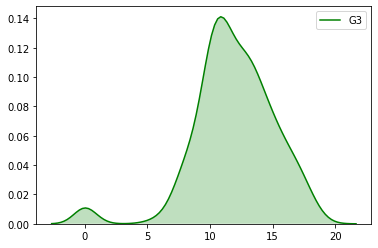

In [18]:
sns.kdeplot(df_port["G3"],color = "g",shade=True);

In [20]:
sns.regplot?

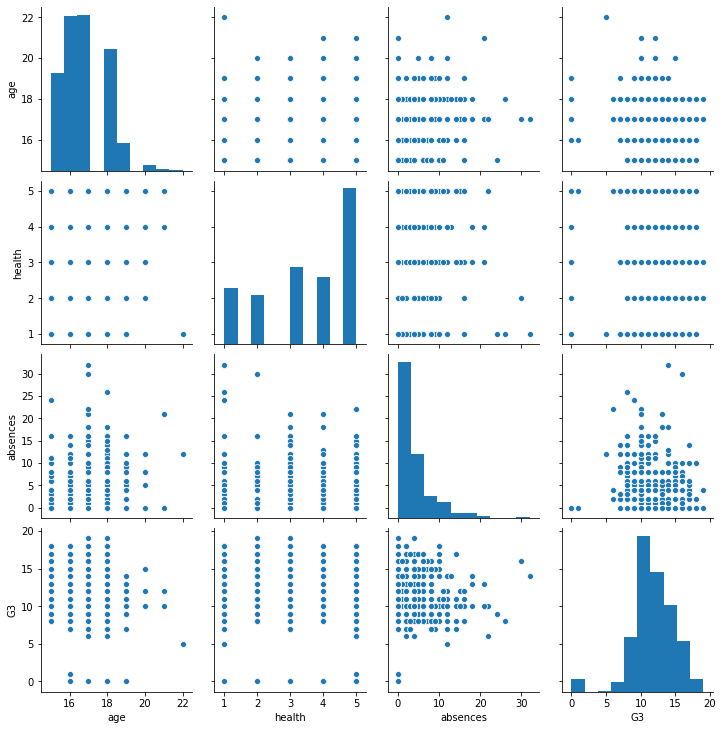

In [23]:
sns.pairplot(df_port[["age", "health", "absences", "G3"]])

Collecting all numeric data:

In [25]:
df_num = df_port.select_dtypes(include = ["float64","int64"])
df_num.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13


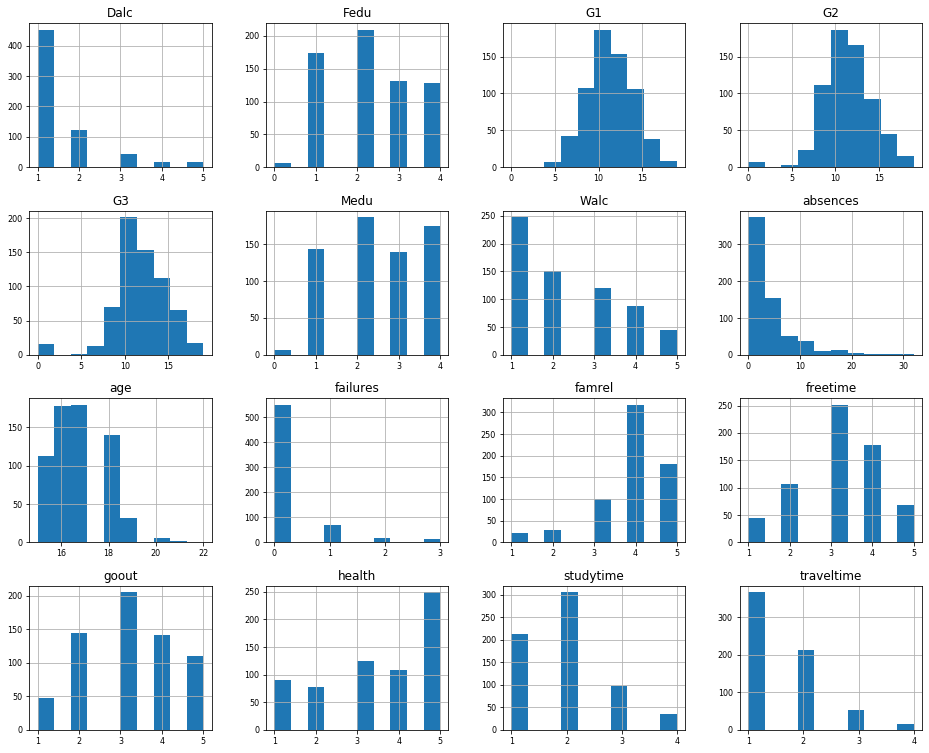

In [24]:
df_num.hist(figsize=(16,13),bins = 10, xlabelsize = 8, ylabelsize = 8);

Using boxplot to find the relationship between Parent's job and Students performance:

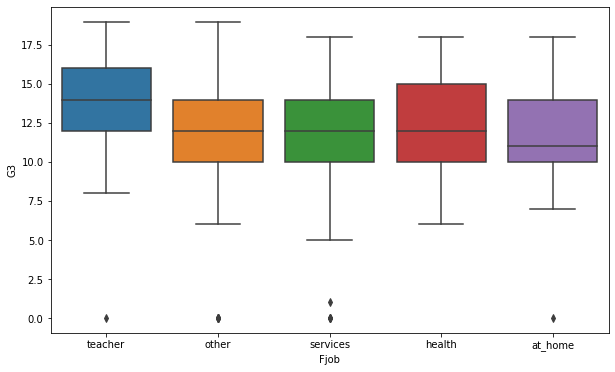

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_port["Fjob"],y=df_port["G3"])

In [26]:
df_port.groupby("Fjob")["G3"].describe()

,count,mean,std,min,25%,50%,75%,max
Fjob,,,,,,,,
at_home,42.0,11.428571,3.201698,0.0,10.0,11.0,14.0,18.0
health,23.0,12.565217,3.130874,6.0,10.0,12.0,15.0,18.0
other,367.0,11.891008,3.074503,0.0,10.0,12.0,14.0,19.0
services,181.0,11.629834,3.438507,0.0,10.0,12.0,14.0,18.0
teacher,36.0,13.583333,3.400630,0.0,12.0,14.0,16.0,19.0


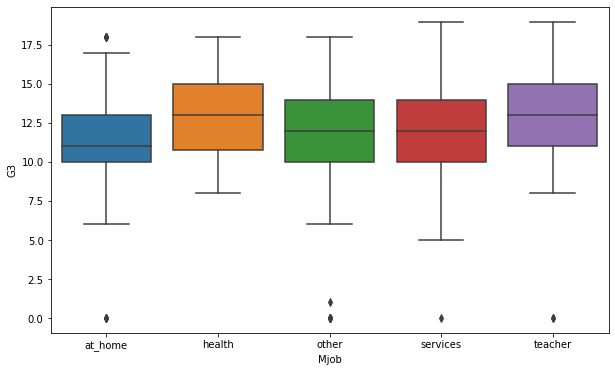

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_port["Mjob"],y=df_port["G3"])

In [28]:
df_port.groupby("Fjob")["G3"].describe()

,count,mean,std,min,25%,50%,75%,max
Fjob,,,,,,,,
at_home,42.0,11.428571,3.201698,0.0,10.0,11.0,14.0,18.0
health,23.0,12.565217,3.130874,6.0,10.0,12.0,15.0,18.0
other,367.0,11.891008,3.074503,0.0,10.0,12.0,14.0,19.0
services,181.0,11.629834,3.438507,0.0,10.0,12.0,14.0,18.0
teacher,36.0,13.583333,3.400630,0.0,12.0,14.0,16.0,19.0


Using boxplot to find the relationship between Parent's Educational Background and Students performance:

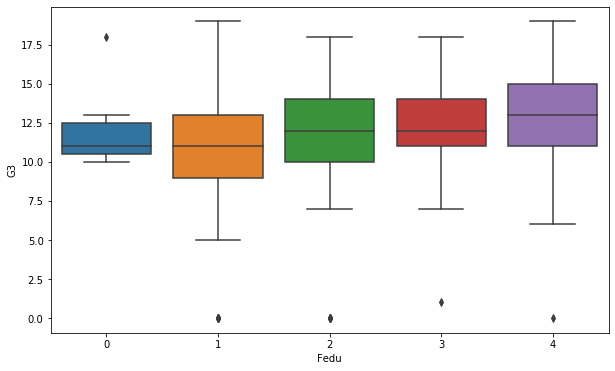

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_port["Fedu"],y=df_port["G3"])

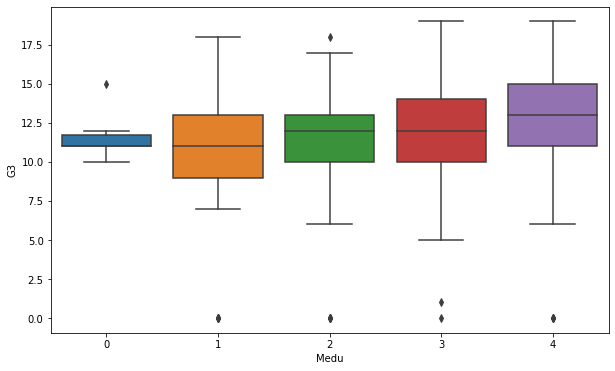

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_port["Medu"],y=df_port["G3"])

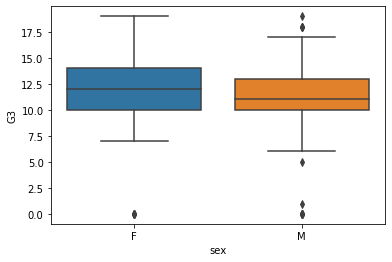

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_port["sex"],y=df_port["G3"])

In [32]:
df_port.groupby("sex")["G3"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,383.0,12.253264,3.124147,0.0,10.0,12.0,14.0,19.0
M,266.0,11.406015,3.320690,0.0,10.0,11.0,13.0,19.0


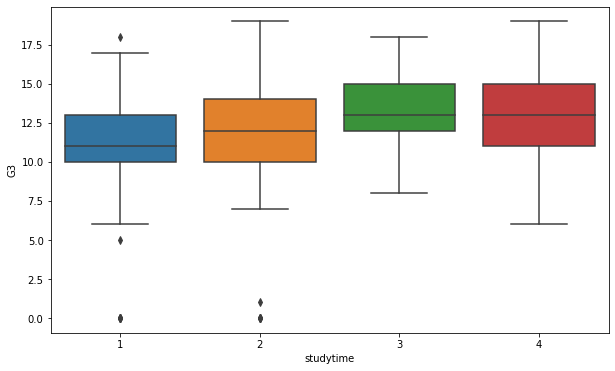

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_port["studytime"],y=df_port["G3"])

In [34]:
df_port["studytime"].value_counts()

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

Correlation between final score and other values:

In [26]:
df_num_corr = df_num.corr()["G3"][:-1]
df_num_corr.sort_values(ascending=True)

failures     -0.393316
Dalc         -0.204719
Walc         -0.176619
traveltime   -0.127173
freetime     -0.122705
age          -0.106505
health       -0.098851
absences     -0.091379
goout        -0.087641
famrel        0.063361
Fedu          0.211800
Medu          0.240151
studytime     0.249789
G1            0.826387
G2            0.918548
Name: G3, dtype: float64

In [36]:
top_list = df_num_corr[abs(df_num_corr)>0.12].sort_values(ascending=False)
print("Top {} features strongly correlated with final_target: \n{}".format(len(top_list), top_list))

Top 10 features strongly correlated with final_target: 
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64


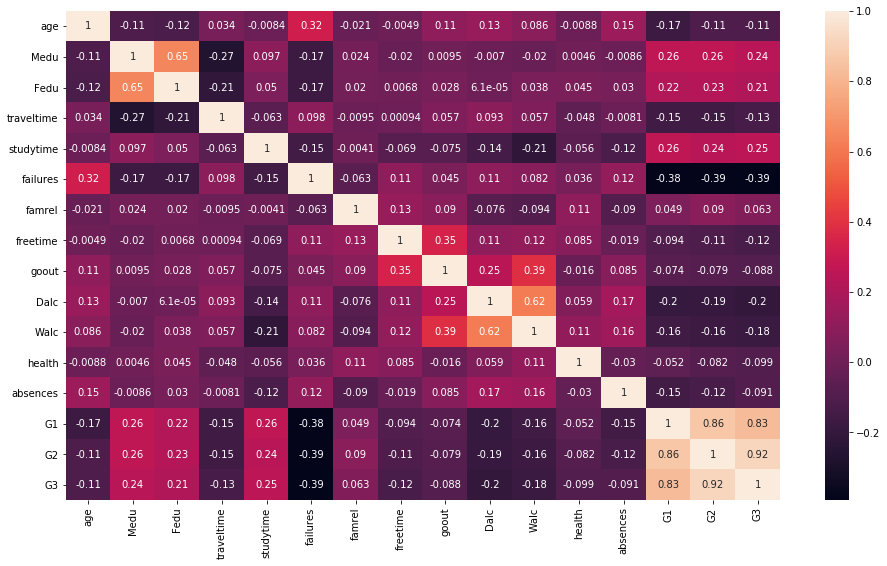

In [89]:
plt.figure(figsize=(16,9))
sns.heatmap(df_num.corr(),annot = True)

------------------------------------------------------------------------------------------------------------------------

Split the data:

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_port, test_size=0.2, random_state=42)

In [25]:
print("Training data shape:",train_set.shape)
print("Testing data shape:", test_set.shape)

Training data shape: (519, 33)
Testing data shape: (130, 33)


In [26]:
train_targets = train_set["G3"].copy()
train_set = train_set.drop("G3", axis=1)
test_targets = test_set["G3"].copy()
test_set = test_set.drop("G3", axis=1)

The distribution of the full dataset, training set & testing set.

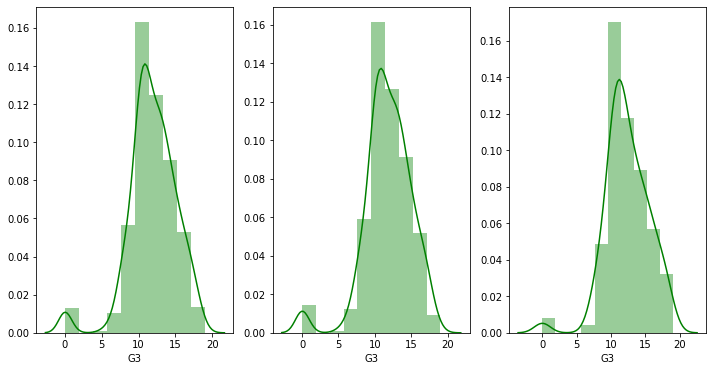

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
sns.distplot(df_port["G3"],color = "g", bins = 10);
plt.subplot(1, 3, 2)
sns.distplot(train_targets,color = "g", bins = 10);
plt.subplot(1, 3, 3)
sns.distplot(test_targets,color = "g", bins = 10);

In [28]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 332 to 102
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      519 non-null    object
 1   sex         519 non-null    object
 2   age         519 non-null    int64 
 3   address     519 non-null    object
 4   famsize     519 non-null    object
 5   Pstatus     519 non-null    object
 6   Medu        519 non-null    int64 
 7   Fedu        519 non-null    int64 
 8   Mjob        519 non-null    object
 9   Fjob        519 non-null    object
 10  reason      519 non-null    object
 11  guardian    519 non-null    object
 12  traveltime  519 non-null    int64 
 13  studytime   519 non-null    int64 
 14  failures    519 non-null    int64 
 15  schoolsup   519 non-null    object
 16  famsup      519 non-null    object
 17  paid        519 non-null    object
 18  activities  519 non-null    object
 19  nursery     519 non-null    object
 20  higher  

In [29]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 636 to 601
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      130 non-null    object
 1   sex         130 non-null    object
 2   age         130 non-null    int64 
 3   address     130 non-null    object
 4   famsize     130 non-null    object
 5   Pstatus     130 non-null    object
 6   Medu        130 non-null    int64 
 7   Fedu        130 non-null    int64 
 8   Mjob        130 non-null    object
 9   Fjob        130 non-null    object
 10  reason      130 non-null    object
 11  guardian    130 non-null    object
 12  traveltime  130 non-null    int64 
 13  studytime   130 non-null    int64 
 14  failures    130 non-null    int64 
 15  schoolsup   130 non-null    object
 16  famsup      130 non-null    object
 17  paid        130 non-null    object
 18  activities  130 non-null    object
 19  nursery     130 non-null    object
 20  higher  

In [30]:
train_set["nursery"].value_counts()

yes    415
no     104
Name: nursery, dtype: int64

In [31]:
df_port.groupby("nursery")["G3"].describe()

,count,mean,std,min,25%,50%,75%,max
nursery,,,,,,,,
no,128.0,11.718750,3.006391,0.0,10.0,11.0,13.0,19.0
yes,521.0,11.952015,3.284521,0.0,10.0,12.0,14.0,19.0


Removing all non-numerical data:

In [32]:
train_set_num = train_set.select_dtypes(include = ["int64"])
train_set_num.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
332,18,2,2,1,3,0,4,3,3,1,2,2,0,18,18
29,16,4,4,1,2,0,4,4,5,5,5,5,4,12,11
302,18,3,2,1,3,0,5,3,2,1,1,3,2,10,11
286,17,2,1,1,1,0,4,4,2,2,4,5,0,12,12
554,17,1,1,2,1,0,3,5,5,2,2,4,3,10,11


In [33]:
test_set_num = test_set.select_dtypes(include = ["int64"])
test_set_num.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
636,18,4,4,1,2,0,3,2,4,1,4,2,4,17,18
220,16,3,1,1,2,0,2,3,3,2,2,4,2,11,11
594,18,4,4,2,2,0,4,3,5,1,2,1,0,18,18
429,16,4,4,1,2,0,5,3,2,1,3,2,5,10,11
72,15,1,1,1,2,0,3,3,4,2,4,5,2,13,11


## Regression Model.

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set_num, train_targets);

Testing the Linear regression model on the Training set:

In [36]:
print("Predictions:\t", lin_reg.predict(train_set_num[:5]))
print("Labels:\t\t", list(train_targets[:5]))

Predictions:	 [18.91622451 11.13658495 11.17022323 12.06530043 11.08617028]
Labels:		 [18, 12, 12, 13, 10]


Calculating the Error of the Training set:

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred = lin_reg.predict(train_set_num)
lin_mse = mean_squared_error(train_targets,pred,squared=False)

print("The Root_Mean_Squared_Error is",lin_mse)

The Root_Mean_Squared_Error is 1.263065571524356


Testing the Linear regression model on the Testing set:

In [41]:
print("Predictions:\t", lin_reg.predict(test_set_num[:5]))
print("Labels:\t\t", list(test_targets[:5]))

Predictions:	 [18.84952548 11.2975934  18.87708955 11.15359062 11.75660215]
Labels:		 [19, 12, 18, 11, 11]


Calculating the Error of the testing set:

In [42]:
pred = lin_reg.predict(test_set_num)
lin_mse = mean_squared_error(test_targets ,pred,squared=False)

print("The Root_Mean_Squared_Error is",lin_mse)

The Root_Mean_Squared_Error is 1.1664402826147426


Using Cross validation:

In [43]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [44]:
lin_scores = cross_val_score(lin_reg, train_set_num, train_targets, scoring="neg_mean_squared_error", cv=5)
scores = np.sqrt(-lin_scores)
display_scores(scores)

Scores: [1.23674937 1.7730131  1.30612463 1.08704266 0.97499901]
Mean: 1.275585756260787
Standard deviation: 0.2741443923261981


<hr>

Using Decision Tree:

In [53]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_num, train_targets);

Testing the Decision tree model on the Training set:

In [54]:
print("Predictions:\t", tree_reg.predict(train_set_num[:5]))
print("Labels:\t\t", list(train_targets[:5]))

Predictions:	 [18. 12. 12. 13. 10.]
Labels:		 [18, 12, 12, 13, 10]


Calculating the Error of the Training set:

In [55]:
pred = tree_reg.predict(train_set_num)
tree_mse = mean_squared_error(train_targets, pred,squared=False)
print("The Root_Mean_Squared_Error is",tree_mse)

The Root_Mean_Squared_Error is 0.0


Testing the Decision tree model on the Testing set:

In [57]:
print("Predictions:\t", tree_reg.predict(test_set_num[:5]))
print("Labels:\t\t", list(test_targets[:5]))

Predictions:	 [17. 11. 17. 12. 11.]
Labels:		 [19, 12, 18, 11, 11]


In [59]:
pred = tree_reg.predict(test_set_num)
tree_mse = mean_squared_error(test_targets, pred,squared=False)
#tree_rmse = np.sqrt(tree_mse)
print("The Root_Mean_Squared_Error is",tree_mse)

The Root_Mean_Squared_Error is 2.02294530136326


Using Cross Validation:

In [60]:
tree_scores = cross_val_score(tree_reg, train_set_num, train_targets, scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-tree_scores)

In [61]:
display_scores(scores)

Scores: [2.14386423 1.53171598 2.89562003 2.36561913 2.05220332 2.66746783
 2.62385506 1.78670302 1.35163718 1.35038121]
Mean: 2.076906699849343
Standard deviation: 0.5331004752220715


## Classification Model.

Using binary classification:

In [65]:
#Make the targets categorical.
def bin_class(bin_val):
    for i in bin_val:
        binary = bin_val >= 10
    binary_dict = {True: 1, False :0}
    binary = binary.map(binary_dict)
    return binary;

In [66]:
val = bin_class(df_port["G3"])
train_val = bin_class(train_targets)
test_val = bin_class(test_targets)

Now we have two categories.

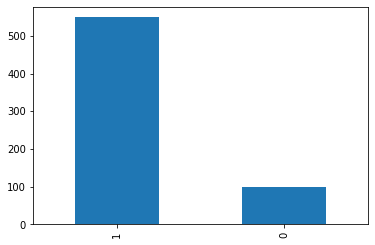

In [67]:
val.value_counts().plot(kind = "bar");

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(train_set_num, train_val)
pred = model.predict(test_set_num)

In [69]:
print("Predictions:\t",pred[:5])
print("labels:\t\t",list(test_val[:5]))

Predictions:	 [1 1 1 1 1]
labels:		 [1, 1, 1, 1, 1]


In [71]:
from sklearn.model_selection import cross_val_score

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [75]:
compute_score(model, train_set_num, train_val, scoring='accuracy')

0.9247946228528754

In [78]:
confusion_matrix?

In [79]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_val,pred)

array([[ 10,   5],
       [  5, 110]])